In [8]:
from Test import data
from Test import file_name
from Test import SN_LC
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.optimize as opt
from Test import mag_to_flux
from matplotlib.pyplot import figure
from Test import rise1
from Test import fall
# from Test import curvefitting_and_plot
from Test import multi
import matplotlib
import matplotlib.cm as cm

different amplitdue

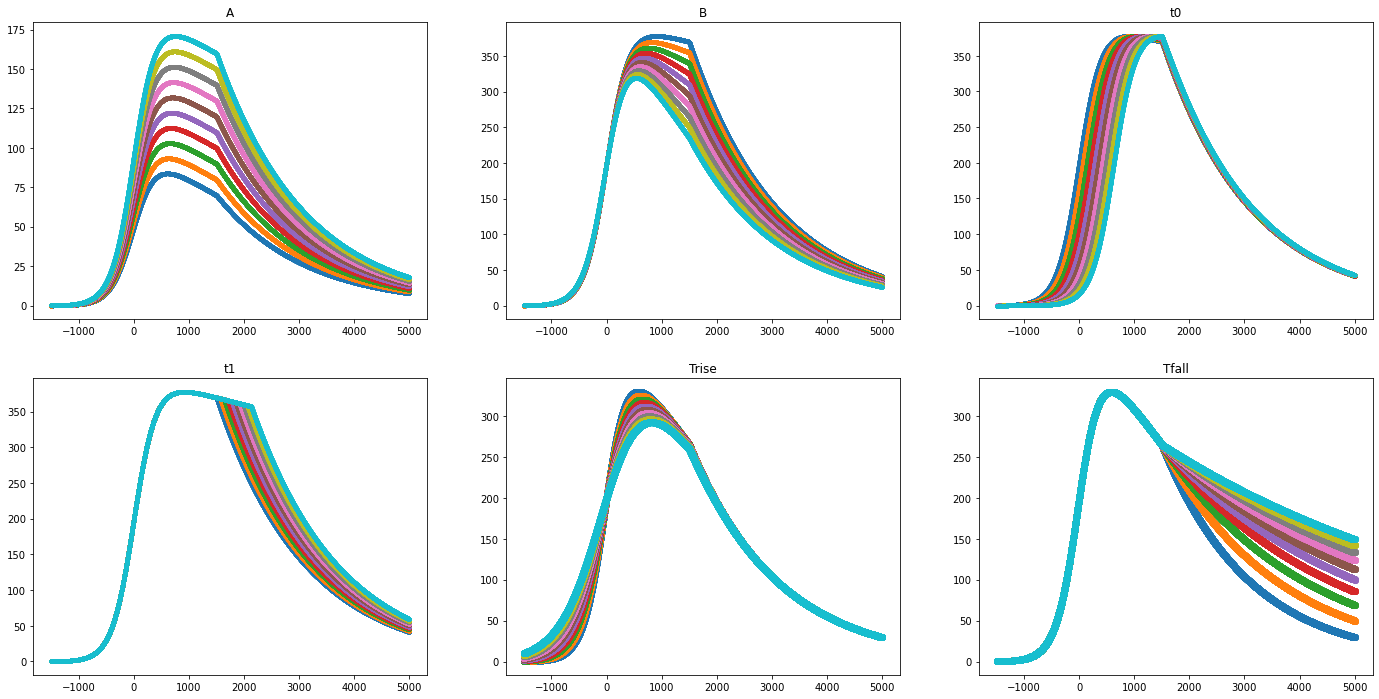

In [10]:
#subplot
time = np.linspace(-1500,5000,10000)
########Amplitude 
A = 100
B = -0.02
t0 = 0
t1 = 1500
Trise = 200
Tfall = 1600
c = 0
plt.subplot(2, 3, 1)
for i in range(10):
     flux = SN_LC(time, A + 10*i, B, t0, t1,Trise, Tfall,c)
     plt.title("A")
     plt.scatter(time, flux, marker='.')
    


time = np.linspace(-1500,5000,10000)
#######Beta
A = 400
B = -0.02
t0 = 0
t1 = 1500
Trise = 200
Tfall = 1600
c = 0
plt.subplot(2, 3, 2)
for i in range(10):
     flux = SN_LC(time, A , B - i*0.01, t0, t1,Trise, Tfall,c)
     plt.title("B")
     plt.scatter(time, flux, marker = '.')


##t0 
time = np.linspace(-1500,5000,10000)
########Amplitude 
A = 400
B = -0.02
t0 = 0
c = 0
t1 = 1500
Trise = 200
Tfall = 1600
plt.subplot(2, 3, 3)
for i in range(10):
    flux = SN_LC(time, A , B, t0+70*i, t1,Trise, Tfall, c)
    plt.title("t0")
    plt.scatter(time, flux, marker = '.')


time = np.linspace(-1500,5000,10000)
########Amplitude 
A = 400
B = -0.02
t0 = 0
c = 0
t1 = 1500
Trise = 200
Tfall = 1600
plt.subplot(2, 3, 4)
for i in range(10):
    flux = SN_LC(time, A , B, t0, t1+70*i,Trise, Tfall,c)
    plt.title('t1')
    plt.scatter(time, flux, marker = '.')


time = np.linspace(-1500,5000,10000)
########Amplitude 
A = 400
B = -0.09

t0 = 0
c = 0
t1 = 1500
Trise = 200
Tfall = 1600
plt.subplot(2,3,5)
for i in range(10):
    flux = SN_LC(time, A , B, t0, t1,Trise+20*i, Tfall,c)
    plt.title('Trise')     
    plt.scatter(time, flux)



A = 400
B = -0.09

t0 = 0
c = 0
t1 = 1500
Trise = 200
Tfall = 1600
plt.subplot(2,3,6)
for i in range(10):
    flux = SN_LC(time, A , B, t0, t1,Trise, Tfall+500*i,c)
    plt.title('Tfall') 
    plt.scatter(time, flux)

RuntimeError: The map-like callable must be of the form f(func, iterable), returning a sequence of numbers the same length as 'iterable'

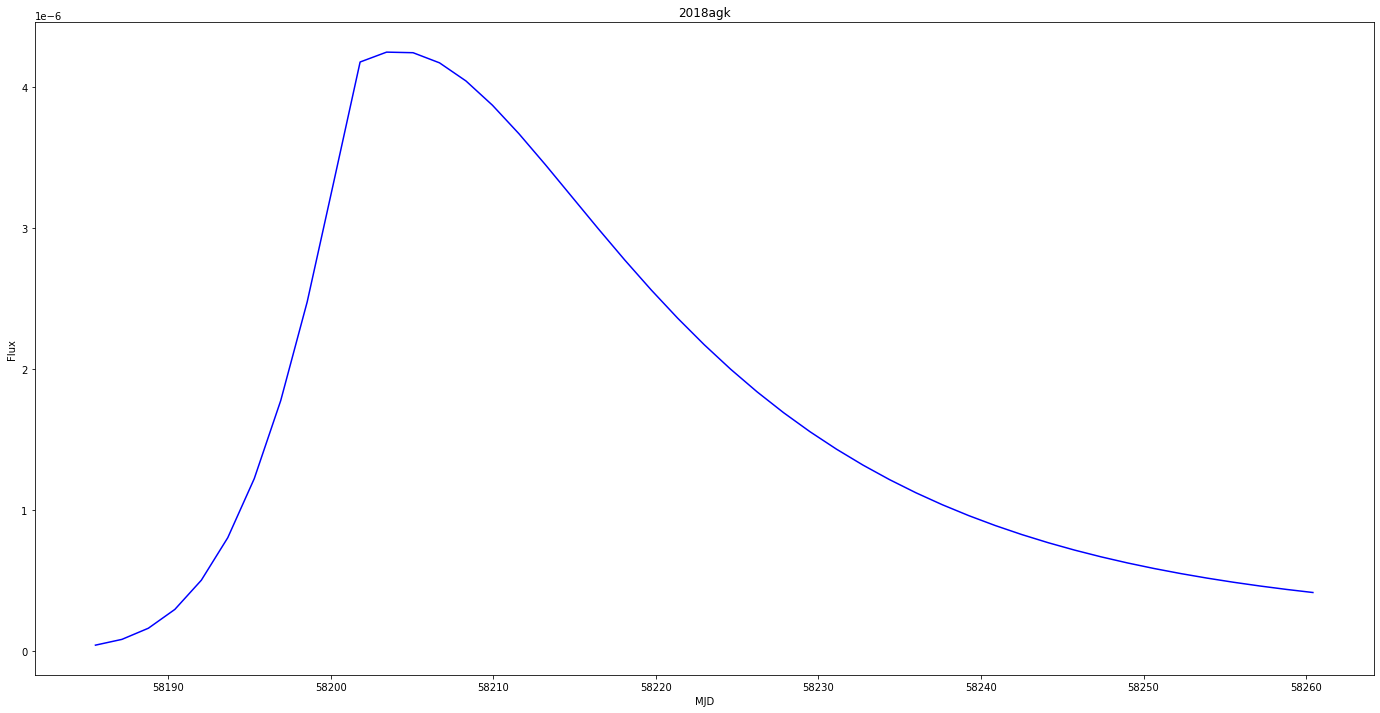

In [1]:
from Test import data
from Test import file_name
from Test import SN_LC
#from Test import multi_curvefit
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.optimize as opt
from Test import mag_to_flux
from matplotlib.pyplot import figure
from Test import rise1
from Test import fall
#from Test import curvefitting_and_plot
from Test import multi
import matplotlib
import matplotlib.cm as cm
from  itertools import islice
from Test import multi_curvefit_test
import species
from Test import Chi_square
target = "2018agk"
filters = ['g']
Instrument = 'GPC1'
file_location = file_name(target)
#multi bands could be plotted based 
MJD = multi(filters = filters, Instrument= Instrument, file_location = file_location)[0]
Mag = multi(filters = filters, Instrument= Instrument, file_location = file_location)[1]
Magerr = multi(filters = filters, Instrument= Instrument, file_location = file_location)[2]
for i in range(len(filters)):
    flux = mag_to_flux(Mag, Magerr, 'PAN-STARRS/PS1.{filter}'.format(filter = filters[i]))[0]
    fluxerr = mag_to_flux(Mag,Magerr,'PAN-STARRS/PS1.{filter}'.format(filter = filters[i]))[1] 
multi_curvefit_test(SN_LC, MJD, flux, fluxerr, title = target, filter_name= filters)



#g:
# para 0 = 2.1902900441552705e-05 +/- 0.0005227240730011786
# para 1 = 1.6537910011137491e-06 +/- 1.8872856352557447e-05
# para 2 = 58205.60002337154 +/- 165.000608689986
# para 3 = 58199.56887850505 +/- 1.9226166153154625
# para 4 = 8.91126874022141 +/- 24.623076883749942
# para 5 = 7.621536901416368 +/- 22.30579333591251
# para 6 = 1.1427569097472194e-06 +/- 2.8250904418577405e-07


# para 0 = 5.223638241701819e-06 +/- 0.0005586776369293613
# para 1 = 4.587099873991601e-07 +/- 8.736507438872201e-06
# para 2 = 58204.34111997036 +/- 999.7169231471718
# para 3 = 58206.19365550392 +/- 0.00023466398366682903
# para 4 = 26.00058039557543 +/- 378.11632773538383
# para 5 = 6.542222476916067 +/- 7.43199068068169
# para 6 = 1.3063598702982018e-06 +/- 3.0619996498869355e-07

#r:

#  scipy curvefit
# para 0 = 0.00019974347490047073
# para 1 = -3.207408967743119e-08
# para 2 = 58247.975081249606
# para 3 = 58280.475
# para 4 = 25.00500070333241
# para 5 = 150.5
# para 6 = 9.499806965135947e-08



# para 0 = 0.00020213493882001432
# para 1 = -3.207408967743119e-08
# para 2 = 58247.97508166971
# para 3 = 58280.475
# para 4 = 25.005000726486386
# para 5 = 150.5
# para 6 = -1.4179737816509966e-06


# Red curve 
# A = 6.576e-6
# B = 5.91e-7
# t0 = 58200.47
# t1 = 58201.58
# Trise = 5.79
# Tfall = 16.73
# c = 1.32e-07

# A = 6.576e-6
# B = 5.91e-7
# t0 = 58200.47
# t1 = 58201.58
# Trise = 5.79
# Tfall = 16.73
# c = 2e-07



In [23]:
#reread the paper and try to figure out the sigma 
#write the function for the chi_square
# (Obsevration - model) **2 / error**2

from lmfit import Model
from lmfit import Parameters



SN_model = Model(SN_LC)
# print(SN_model.param_names)
# print(SN_model.independent_vars)
params = SN_model.make_params(A = 6.576e-6, B = 5.91e-7, t0 = 58200.47, t1 = 58201.58, Trise = 5.79, Tfall = 16.73, c = 2e-07)







# time = np.linspace(np.min(MJD[0]), np.max(MJD[0]), 10000)
result = SN_model.fit(flux[0], params, time = MJD[0])
print(result.fit_report())
# plt.scatter(flux, time, y_eval)


NameError: name 'A' is not defined

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/eddie_tang/opt/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:09<00:00, 101.87it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 7 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [128.19540379 119.8905396  103.25604278 125.55846887  69.77848385
  82.59132534  47.24343846]
[6.641932456167825e-06, -5.002057624457284e-09, -11.090093809626856, -10.30589315981123, 3.477449878054413, 19.85567312609551, 7.724618205015637e-09]


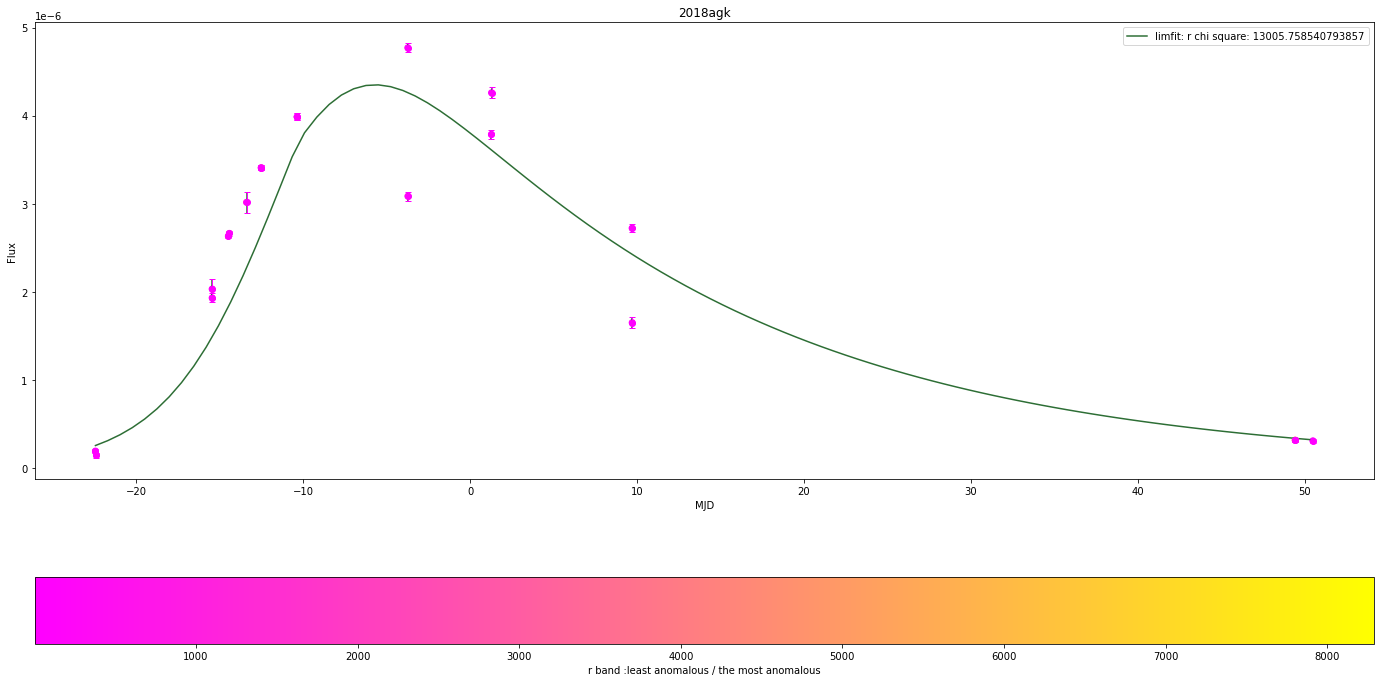

In [1]:
from Test import data
from Test import file_name
from Test import SN_LC
#from Test import multi_curvefit
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.optimize as opt
from Test import mag_to_flux
from matplotlib.pyplot import figure
from Test import rise1
from Test import fall
#from Test import curvefitting_and_plot
from Test import multi
import matplotlib
import matplotlib.cm as cm
from  itertools import islice
from Test import multi_curvefit_test
import species
from Test import Chi_square
from Test import limfit_test_function

target = "2018agk"
filters = ['r']
Instrument = 'GPC1'
file_location = file_name(target)
#multi bands could be plotted based 
MJD = multi(filters = filters, Instrument= Instrument, file_location = file_location)[0]
Mag = multi(filters = filters, Instrument= Instrument, file_location = file_location)[1]
Magerr = multi(filters = filters, Instrument= Instrument, file_location = file_location)[2]
for i in range(len(filters)):
    flux = mag_to_flux(Mag, Magerr, 'PAN-STARRS/PS1.{filter}'.format(filter = filters[i]))[0]
    fluxerr = mag_to_flux(Mag,Magerr,'PAN-STARRS/PS1.{filter}'.format(filter = filters[i]))[1] 

limfit_test_function(SN_LC, MJD, flux, fluxerr, title = target, filter_name= filters)


  0%|          | 0/1000 [00:00<?, ?it/s]/Users/eddie_tang/opt/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  4%|▍         | 43/1000 [00:00<00:08, 115.66it/s]/Users/eddie_tang/Desktop/Test.py:130: RuntimeWarning: overflow encountered in exp
  rise.append((A + B * (time[i]- t0)) / ( 1 + np.exp((-(time[i] - t0))/ Trise)))
 22%|██▎       | 225/1000 [00:01<00:06, 126.12it/s]/Users/eddie_tang/Desktop/Test.py:156: RuntimeWarning: overflow encountered in exp
  fall.append(((A + B * (t1 - t0)) * np.exp((-(time[i] - t1))/Tfall)) / (1 + np.exp((-(time[i] - t0)) / Trise)))
100%|██████████| 1000/1000 [00:08<00:00, 124.28it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 7 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [ 95.68786299 133.6771025   86.6116663   70.60651495  94.37203716
  82.61252956 119.32891789]
[4.62748042575283e-06, -1.7189620433418605e-08, -201.8270188003065, 94.09092113212084, 23.01318444637718, 76.26265497793543, 6.302122997288734e-08]


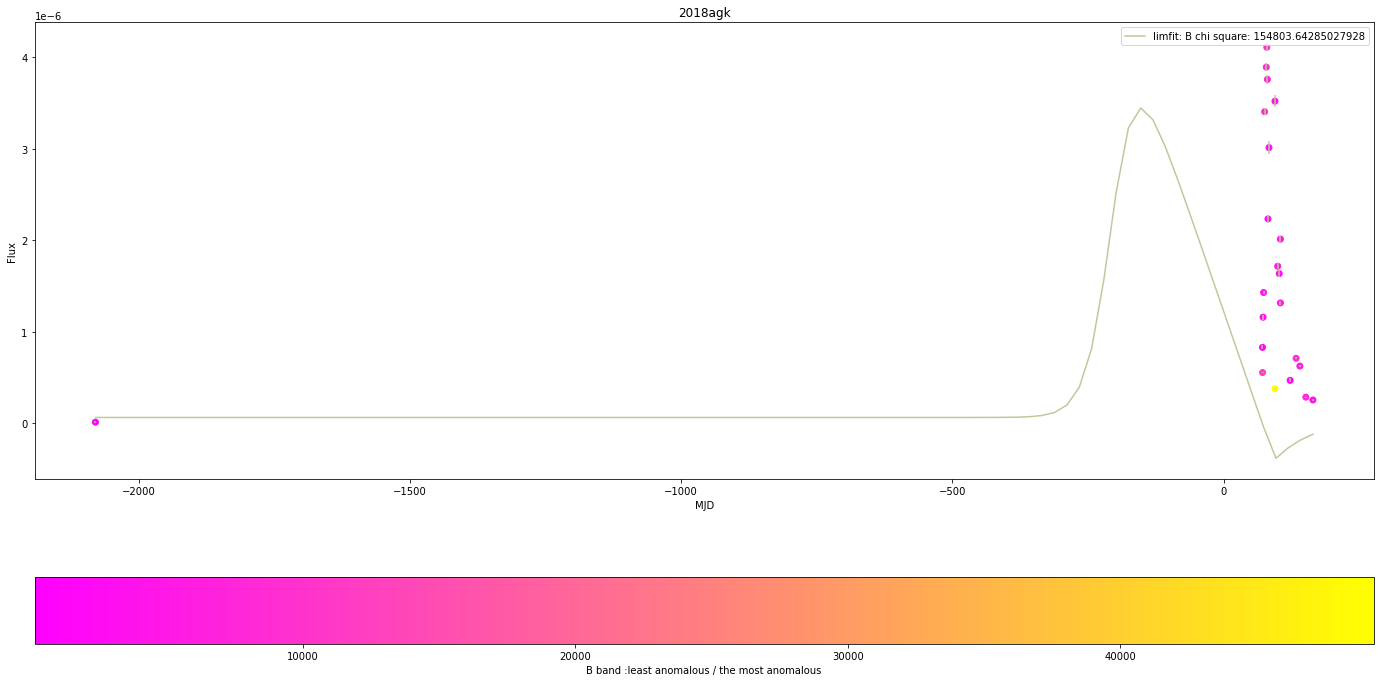

In [2]:
# filters = ['B']
# Instrument = 'Direct/4Kx4K'
# file_location = file_name(target)
# #multi bands could be plotted based 
# MJD = multi(filters = filters, Instrument= Instrument, file_location = file_location)[0]
# Mag = multi(filters = filters, Instrument= Instrument, file_location = file_location)[1]
# Magerr = multi(filters = filters, Instrument= Instrument, file_location = file_location)[2]
# for i in range(len(filters)):
# #    MJD = (MJD[i] - np.min(MJD[i]))/np.ptp(MJD[i])
#     flux = mag_to_flux(Mag, Magerr, 'LCO/CSP.{filter}'.format(filter = filters[i]))[0]
#     fluxerr = mag_to_flux(Mag,Magerr,'LCO/CSP.{filter}'.format(filter = filters[i]))[1] 

# limfit_test_function(SN_LC, MJD, flux, fluxerr, title =target, filter_name= filters)


  0%|          | 0/1000 [00:00<?, ?it/s]/Users/eddie_tang/opt/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:16<00:00, 59.31it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 7 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [118.54978231 131.42198835 110.56178451  86.96873913  75.35576476
 126.56388697 130.64130775]
[4.780368888301358e-06, -8.361702593264517e-09, -20.809237148380788, -13.804907367910104, 2.199944886207727, 9.263416668865583, 6.59410185227529e-07]


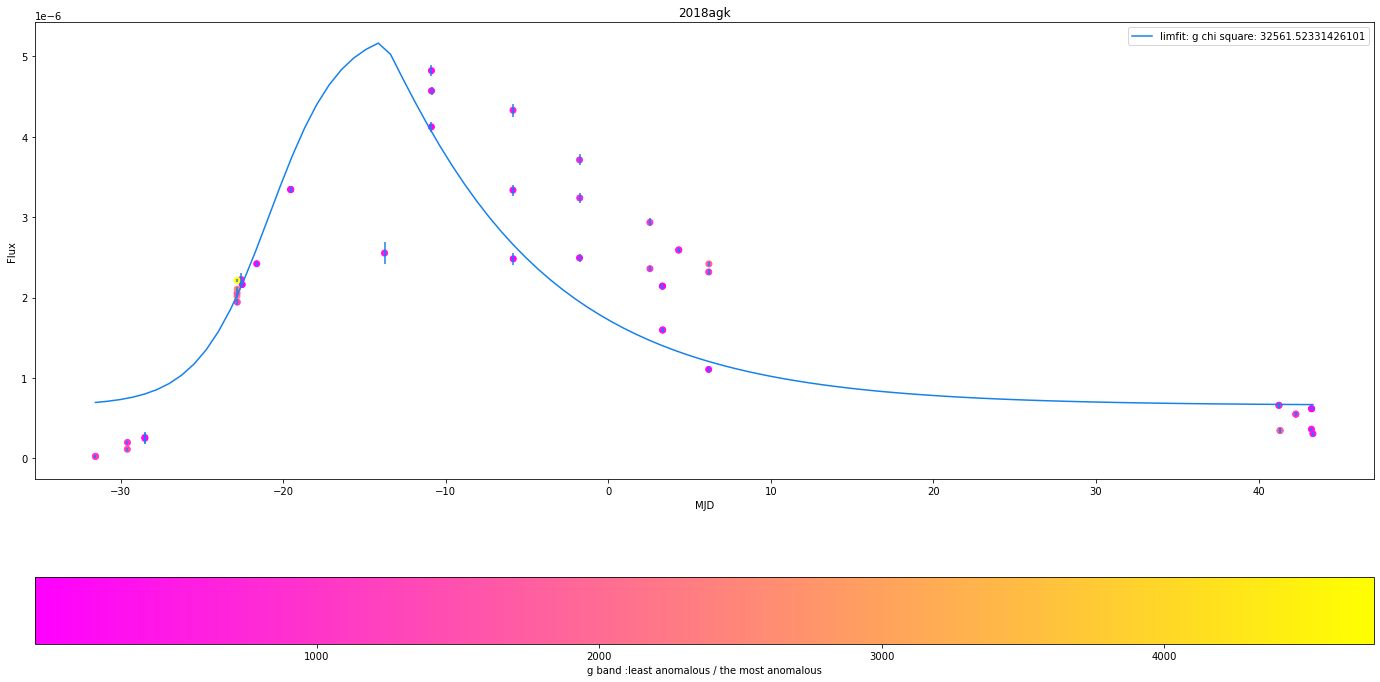

chi_square_red: 5194.065746677673


/Users/eddie_tang/Desktop/Test.py:156: RuntimeWarning: overflow encountered in exp
  fall.append(((A + B * (t1 - t0)) * np.exp((-(time[i] - t1))/Tfall)) / (1 + np.exp((-(time[i] - t0)) / Trise)))
/Users/eddie_tang/Desktop/Test.py:130: RuntimeWarning: overflow encountered in exp
  rise.append((A + B * (time[i]- t0)) / ( 1 + np.exp((-(time[i] - t0))/ Trise)))


chi_square_scipy: 34524.203441018995


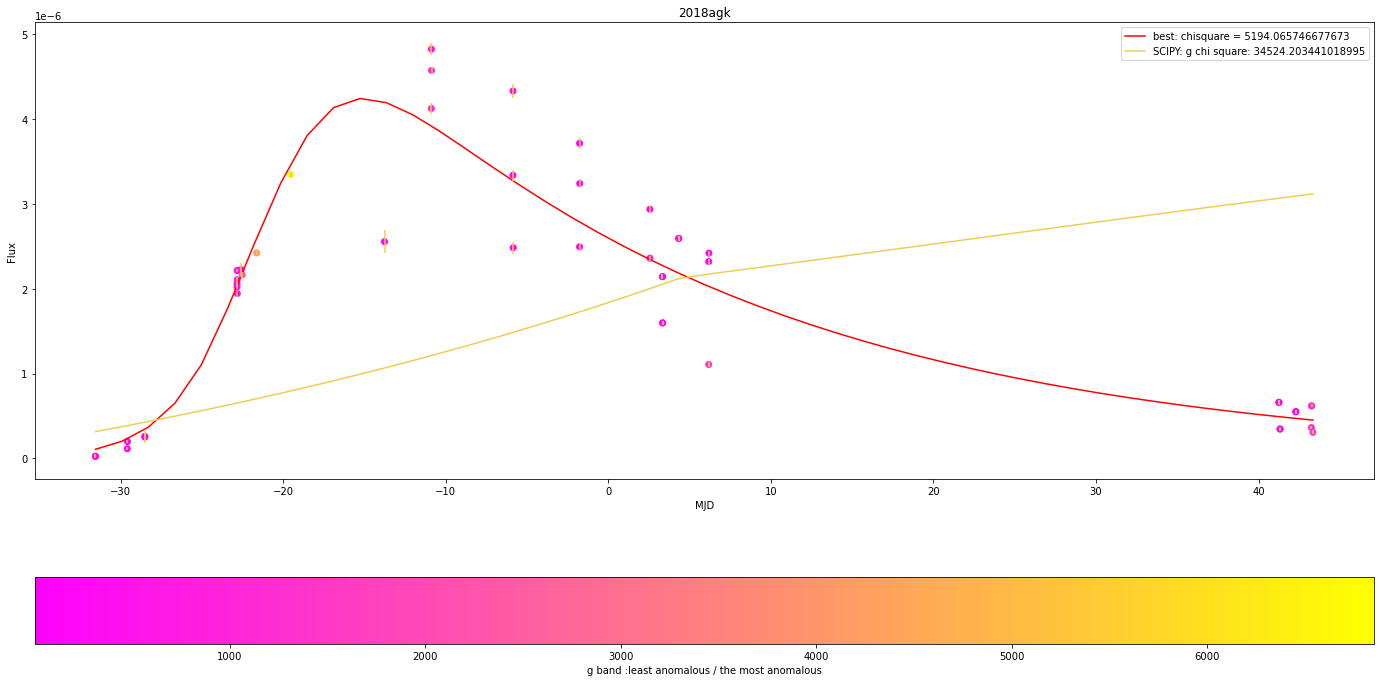

In [1]:
# input the data(time) and other parameters in to SNLC model first, to get the expected value
# calculate the chisquare_value for all data points 
# apply optimize.differential_evolution to minimize the chisquare value. 
# apply the bounds to the differential_evolution function 
from Test import data
from Test import file_name
from Test import SN_LC
from Test import mag_to_flux
from Test import differential_evolution_plots
from Test import multi
from Test import multi_curvefit_test
from Test import mag_to_flux
from Test import rise1
from Test import fall
from Test import multi_curvefit_test
from Test import limfit_test_function
target = "2018agk"
filters = ['g']
Instrument = 'GPC1'
file_location = file_name(target)
#multi bands could be plotted based 
MJD = multi(filters = filters, Instrument= Instrument, file_location = file_location)[0]
Mag = multi(filters = filters, Instrument= Instrument, file_location = file_location)[1]
Magerr = multi(filters = filters, Instrument= Instrument, file_location = file_location)[2]
for i in range(len(filters)):
    flux = mag_to_flux(Mag, Magerr, 'PAN-STARRS/PS1.{filter}'.format(filter = filters[i]))[0]
    fluxerr = mag_to_flux(Mag,Magerr,'PAN-STARRS/PS1.{filter}'.format(filter = filters[i]))[1] 

#multi_curvefit_test(SN_LC, MJD, flux, fluxerr, title = target, filter_name= filters)

limfit_test_function(SN_LC, MJD, flux, fluxerr, title = target, filter_name= filters)


differential_evolution_plots(SN_LC, MJD, flux, fluxerr, title = target, filter_name= filters)